<a href="https://colab.research.google.com/github/yasser-alaa/machine_learning/blob/master/visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls "/content/drive/My Drive/Colab Notebooks/Pokemon.txt"
path = "/content/drive/My Drive/Colab Notebooks/Pokemon.txt"

'/content/drive/My Drive/Colab Notebooks/Pokemon.txt'


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [0]:
df = pd.read_csv(path)
df.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


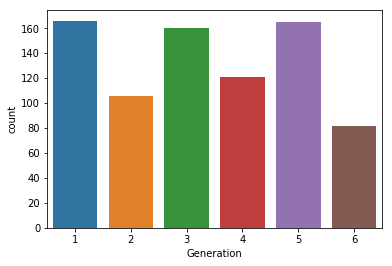

In [0]:
sb.countplot(data = df , x =  'Generation' )

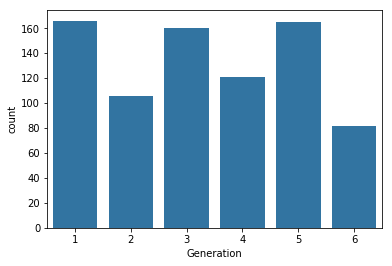

In [0]:
#seaborn has auto coloring which makes confusion in vision

#we get the basic color in the color_pallete array
basic_color = sb.color_palette()[0]
sb.countplot(data = df , x =  'Generation',color = basic_color )

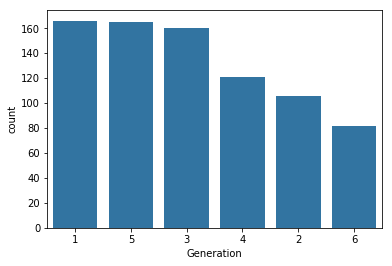

In [0]:
#now since it is nominal data (categorical and the order does not matter) we will arrange them so that the most frequent in the first bar

sb.countplot(data = df , x = 'Generation' , color = basic_color , order = df['Generation'].value_counts().index)

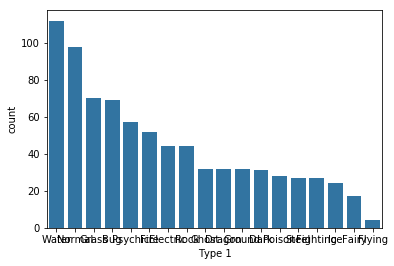

In [0]:
sb.countplot(data = df , x = 'Type 1' , color = basic_color , order = df['Type 1'].value_counts().index)
#when words are very long we should use y axis for labels not x axis

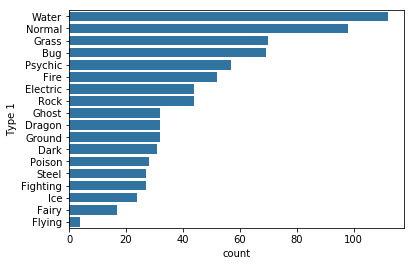

In [0]:
sb.countplot(data = df , y = 'Type 1' , color = basic_color , order = df['Type 1'].value_counts().index)

In [0]:
total_count = len(df)
max_element_count = df['Type 1'].value_counts().max()
max_percent = max_element_count / total_count
print(max_percent)


0.14


In [0]:
# generate tick mark locations and names

#since max type has 0.14 percent then we want to make small steps from zero to 0.14 .. increasing by 0.02

tick_percentages = np.arange(0,max_percent,0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_percentages]


Text(0.5, 0, 'percentages')

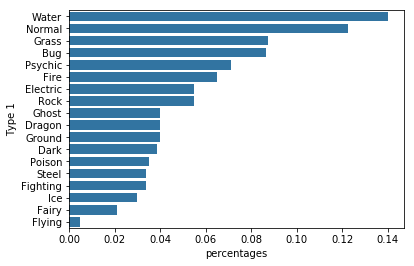

In [0]:
sb.countplot(data = df , y = 'Type 1' , color = basic_color , order = df['Type 1'].value_counts().index)
#first arg in xticks is the position of each tick, so we multiply each percentage to the total count to get the position right
plt.xticks(ticks = tick_percentages * df.shape[0] ,labels = tick_names)
plt.xlabel('percentages')

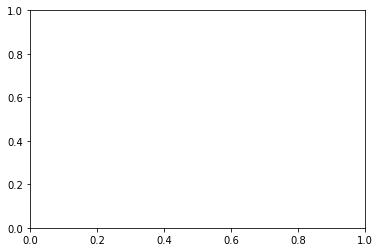

In [0]:
locs , labels = plt.xticks()

NameError: ignored

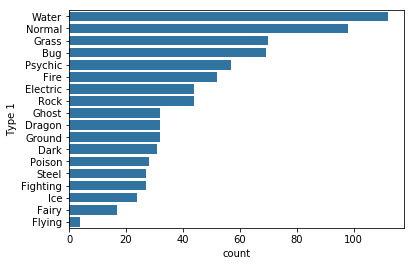

In [0]:
sb.countplot(data = df , y = 'Type 1' , color = basic_color , order = df['Type 1'].value_counts().index)

# loop through each pair of locations and labels
for i in range(counts.shape[0]):
  count = counts[i]
  perc = '{:0.1f}%'.format(100*count/df.shape[0])
  plt.text(count+1 ,  i , perc ) # we add +1 for x position so that it will be just after the end of the bar

In [0]:
null_counts = df.isna().sum()
null_counts.index.values

In [0]:
base_color = sb.color_palette()[0]
sb.barplot(y= null_counts.index.values , x =null_counts ,color = base_color )

In [0]:
### histograms are used for quantitative attr
bins = np.arange(0,df['Attack'].max()+10,7)
plt.hist(data = df , x = 'Attack' , bins = bins)

In [0]:
sb.distplot(df['Attack'])

In [0]:
fig, axes = plt.subplots(2, 2) # grid of 3x4 subplots
axes = axes.flatten() # reshape from 3x4 array into 12-element vector
for i in range(4):
    plt.sca(axes[i]) # set the current Axes
    plt.hist(data = df , x = 'Attack' , bins = bins) # print conventional subplot index number to middle of Axes

In [0]:
plt.hist(df['Sp. Atk'])
plt.xlim(25,100)

In [0]:
#e must decrease the spaces beteen bars of histogram
bins_edges = np.arange(40,80+7,2)
plt.hist(df['Sp. Atk'])
plt.xlim(40,100)

In [4]:
!ls "/content/drive/My Drive/Colab Notebooks/fuel_econ.csv.txt"
path = "/content/drive/My Drive/Colab Notebooks/fuel_econ.csv.txt"

'/content/drive/My Drive/Colab Notebooks/fuel_econ.csv.txt'


In [5]:
df = pd.read_csv(path)
df.head(5)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


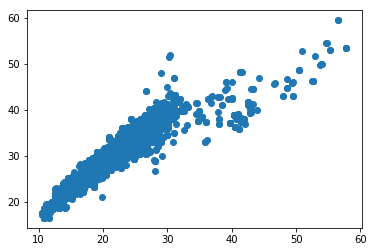

In [0]:
plt.scatter(data = df , x = 'city' , y = 'highway')

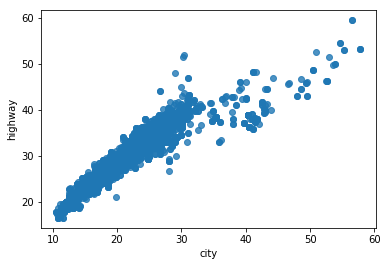

In [0]:
sb.regplot(x = df['city'] , y = df['highway'],fit_reg = False)

([<matplotlib.axis.YTick at 0x7f14c00089b0>,
 <a list of 6 Text yticklabel objects>)

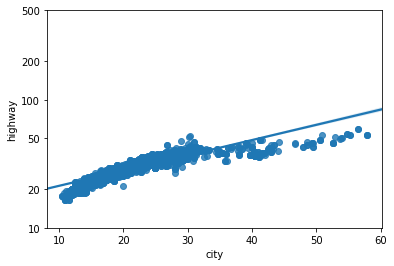

In [0]:
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

sb.regplot(df['city'], df['highway'].apply(log_trans))
tick_locs = [10, 20, 50, 100, 200, 500]
plt.yticks(log_trans(tick_locs), tick_locs)

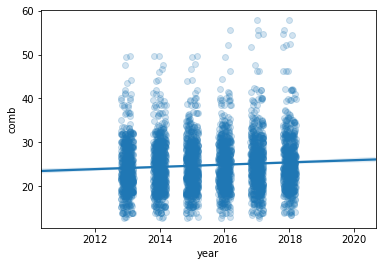

In [0]:
sb.regplot(df['year'] , df['comb'] ,x_jitter = 0.2, scatter_kws = {'alpha' : 1/5}) # alpha zero is full transparency .. one is full opaqui // x_jitter bet5ly el points randomly yemen 0.2 or shemal 0.2 

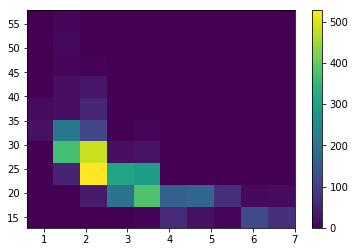

In [0]:
plt.hist2d(x = df['displ'] , y = df['comb']  )
plt.colorbar()

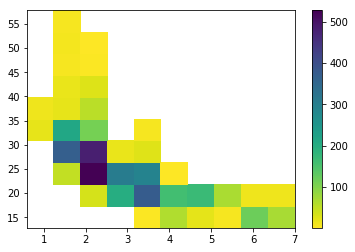

In [0]:
plt.hist2d(x = df['displ'] , y = df['comb'] , cmin=0.5 , cmap = 'viridis_r' )  #adding cmin so that putting min score to make a colored box / viridis_r to reverse colors
plt.colorbar()

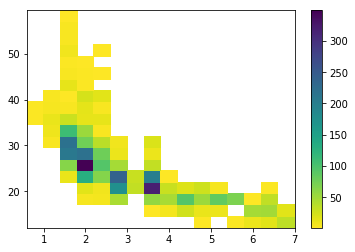

In [0]:
binsx = np.arange(0.6,7+0.4,0.4)
binsy = np.arange(12,58+2.5,2.5)
plt.hist2d(x = df['displ'] , y = df['comb'] , cmin=0.5 , cmap = 'viridis_r' ,bins = [binsx,binsy]  )  #adding cmin so that putting min score to make a colored box / viridis_r to reverse colors
plt.colorbar()

In [0]:
df[['displ','comb']].describe()

,displ,comb
count,3929.000000,3929.000000
mean,2.950573,24.791339
std,1.305901,6.003246
min,0.600000,12.821700
25%,2.000000,20.658100
50%,2.500000,24.000000
75%,3.600000,28.227100
max,7.000000,57.782400


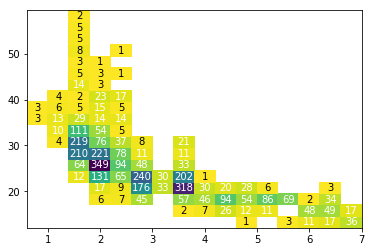

In [0]:
# hist2d returns a number of different variables, including an array of counts
bins_x = np.arange(0.6,7+0.4,0.4)
bins_y = np.arange(12,58+2.5,2.5)
h2d = plt.hist2d(data = df, x = 'displ', y = 'comb',
               bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 0.5)

counts = h2d[0]

# loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 10: # whitness on darker cells
            plt.text(bins_x[i]+0.2, bins_y[j]+1.25, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.2, bins_y[j]+1.25, int(c),
                     ha = 'center', va = 'center', color = 'black')

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

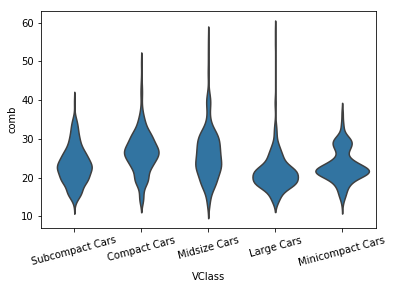

In [0]:
sb.violinplot(df['VClass'] , df['comb'] , color = sb.color_palette()[0] , inner = None)
plt.xticks(rotation = 15)

(30, 672.0)

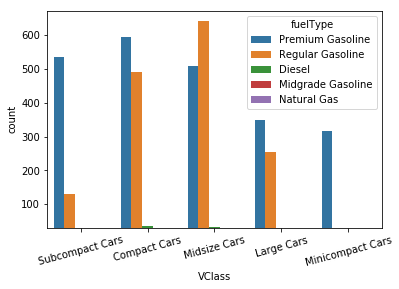

In [0]:
sb.countplot(data = df, x = 'VClass', hue = 'fuelType')
plt.xticks(rotation = 15)
plt.ylim(30)

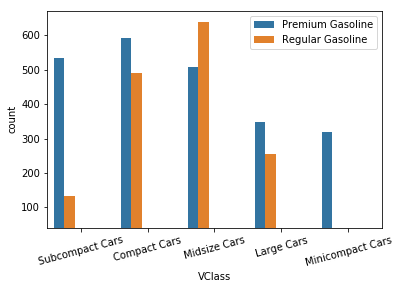

In [0]:
ax = sb.countplot(data = df, x = 'VClass', hue = 'fuelType')
plt.xticks(rotation = 15)
plt.ylim(40)
ax.legend(loc = 1, ncol = 1, labels = ('Premium Gasoline','Regular Gasoline'))


In [0]:
#another way
ct_counts = df.groupby(['VClass', 'fuelType']).size()
ct_counts = ct_counts.reset_index(name = 'countsss')
#Pandas reset_index() is a method to reset index of a Data Frame. reset_index() method sets a list of integer ranging from 0 to length of data as index.
ct_counts = ct_counts.pivot(index = 'fuelType', columns = 'VClass', values = 'countsss')

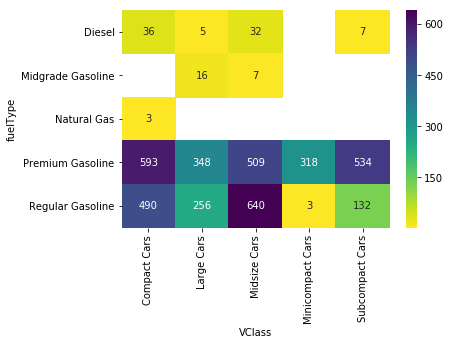

In [0]:
sb.heatmap(ct_counts, annot = True, fmt = '.0f' ,cmap= 'viridis_r')
#annot = True makes it so annotations show up in each cell, but the default string formatting only goes to two digits of precision. Adding fmt = 'd' means that annotations will all be formatted as integers instead. You can use fmt = '.0f' if you have any cells with no counts, in order to account for NaNs.

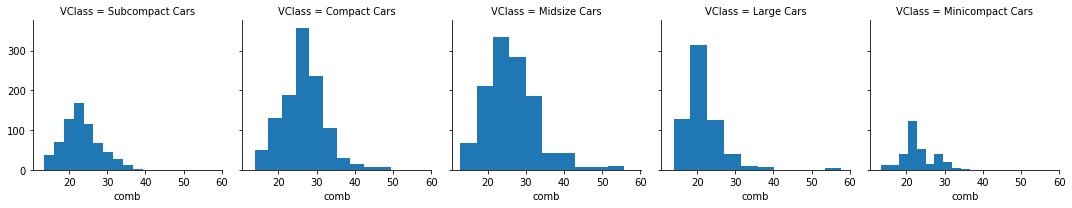

In [0]:
##
g = sb.FacetGrid(data = df, col = 'VClass')
g.map(plt.hist,'comb')

In [0]:
#make sure all bins share the same number of bins
bins_edges = np.arange(0,df['comb'].max() + 3,3)
g = sb.FacetGrid(data = df, col = 'VClass')
g.map(plt.hist,'comb',sharey = False , bins = bins_edges)

## multivariate visualizations 

In [6]:
df.head(1)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4


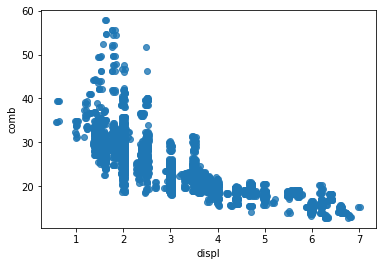

In [10]:
sb.regplot(x = df['displ'] , y = df['comb'] , fit_reg=False , x_jitter=0.04 )

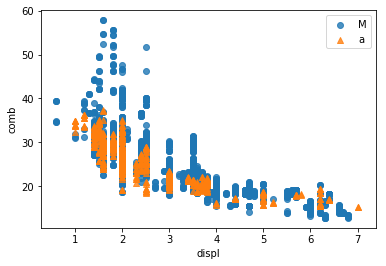

In [92]:
trans = [['Automatic' , 'o'] , ['Manual','^']]
for type_ , marker in trans:   
  n = np.array([],dtype = bool)
  for i in range(df.shape[0]):
    n = np.append(n,type_ in df['trans'][i])
  sb.regplot(data = df[n] , marker=marker ,x = 'displ' , y = 'comb' , fit_reg=False )
  plt.legend(type_)

In [97]:
df['co2'].describe()

count    3929.000000
mean      376.564266
std        92.338892
min        29.000000
25%       315.000000
50%       369.000000
75%       429.000000
max       692.000000
Name: co2, dtype: float64

Text(0.5, 0, 'displacment')

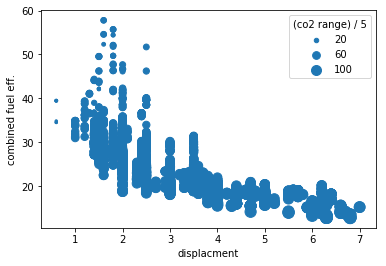

In [103]:
### to plot the third arg numeric variable , use s in mayplot 
plt.scatter(data = df ,x = 'displ' , y = 'comb' ,s = df['co2']/5)

# dummy series for adding legend
sizes = [20, 60, 100]
base_color = sb.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s, color = base_color))
plt.legend(legend_obj, sizes , title = '(co2 range) / 5')
plt.ylabel('combined fuel eff.')
plt.xlabel('displacment')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


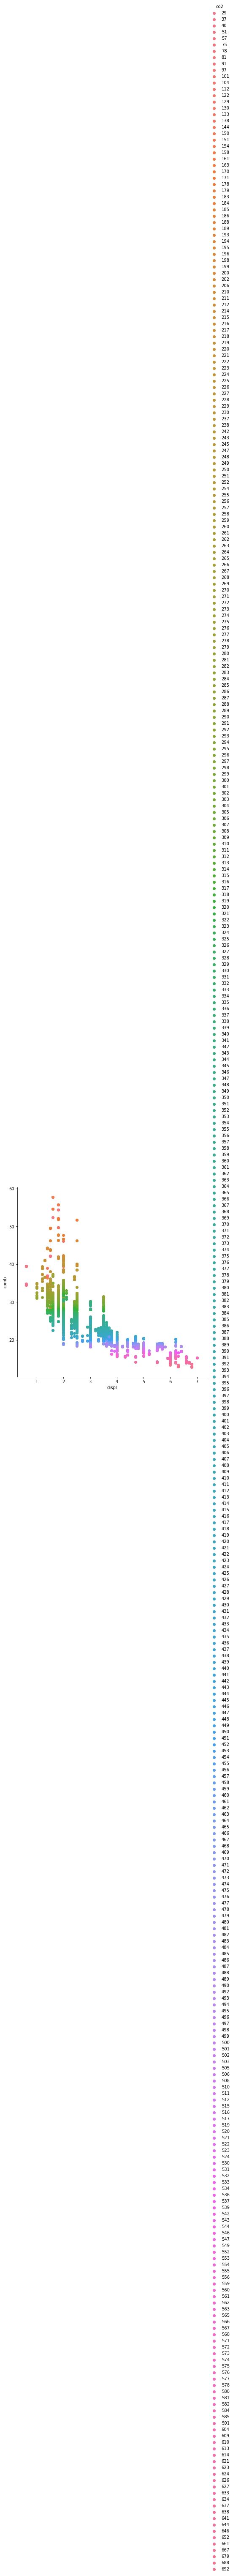

In [113]:
# using colors 
#facet in english means : a side or aspect of something
#hue is a value represents a freq of a color .. high freq. produces blue and vice versia 
#so according to the value it puts a color .. red for low values and blue for high one
g = sb.FacetGrid(data = df, hue = 'co2', size = 7) #hue must be categorical variable not quantitative
g.map(plt.scatter, 'displ', 'comb')
g.add_legend()

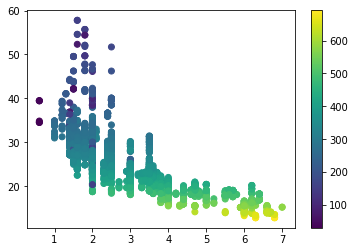

In [112]:
plt.scatter(data = df, x = 'displ', y = 'comb', c = 'co2')
plt.colorbar()